# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
import numpy as np
import torch
from collections import deque
from time import time
import matplotlib.pyplot as plt

In [3]:
from unityagents import UnityEnvironment

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:\n', states[0])
print('The state for the second agent looks like:\n', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like:
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]
The state for the second agent looks like:
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.4669857  -1.5         0.          0.
 -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [7]:
from maddpg_agent import Group
group = Group(num_agents=num_agents, state_size=state_size, action_size=action_size, random_seed=0)

In [11]:
def maddpg(n_episodes=2000, max_t=1000, eps_decay = 1):
    scores_deque = deque(maxlen=100)
    scores_list  = []
    solved = False
    
    episode_solved = n_episodes + 1
    
    for i_episode in range(1, n_episodes+1):
        t1 = time()
        
        env_info = env.reset(train_mode=True)[brain_name]
        group.reset() 
        states = env_info.vector_observations
        scores = np.zeros(num_agents) 
        
        eps = 1.0 # noise decay
        eps_min = 0.1
        
        for t in range(max_t):
            actions     = group.act(states, eps) 
            env_info    = env.step(actions)[brain_name]  # send the action to the environment
            next_states = env_info.vector_observations   # get the next state
            rewards     = env_info.rewards               # get the reward
            dones       = env_info.local_done            # see if episode has finished
            
            group.step(states, actions, rewards, next_states, dones, t) 
            
            states  = next_states
            scores += rewards
            score   = scores.max()
            
            if np.any(dones):
                break 
        
        scores_deque.append(score)
        scores_list.append(score)
        eps = max(eps_min, eps_decay*eps) # update eps
        
        t2 = time()
    
        print('\rEpisode {}\tCurrent Score {:.2f}\tAverage Score: {:.2f}\tTime: {} seconds'\
              .format(i_episode, scores_deque[-1], np.mean(scores_deque),int(t2-t1)), end='')
        
        if i_episode % 100 == 0: print()

        if np.mean(scores_deque) > 0.5 and not solved:
            print('\nProbelm solved in episode {}!'.format(episode_solved))
            torch.save(group.checkpoint(), 'checkpoint_group_solved.pth')
            solved = True
            n_solved = i_episode            
            
        if solved and (i_episode >= n_solved + 100): break # track extra 100 episodes
            
    return scores_list

In [12]:
from workspace_utils import active_session # keep connected to the udacity server while training

In [13]:
start_time = time()

with active_session():
    scores = maddpg()

end_time   = time()
tot_time   = end_time - start_time
print("\nTotal training time: {:2} minutes {:2} seconds".format(int(tot_time/60), int(tot_time%60)))

Episode 100	Current Score 0.00	Average Score: 0.01	Time: 0 seconds
Episode 200	Current Score 0.00	Average Score: 0.01	Time: 0 seconds
Episode 300	Current Score 0.09	Average Score: 0.01	Time: 0 seconds
Episode 400	Current Score 0.00	Average Score: 0.00	Time: 0 seconds
Episode 500	Current Score 0.20	Average Score: 0.03	Time: 2 seconds
Episode 600	Current Score 0.00	Average Score: 0.17	Time: 0 seconds
Episode 700	Current Score 0.30	Average Score: 0.19	Time: 3 seconds
Episode 800	Current Score 0.40	Average Score: 0.25	Time: 3 secondss
Episode 900	Current Score 0.80	Average Score: 0.38	Time: 6 secondss
Episode 1000	Current Score 0.10	Average Score: 0.22	Time: 1 seconds
Episode 1100	Current Score 0.10	Average Score: 0.39	Time: 0 secondss
Episode 1145	Current Score 1.10	Average Score: 0.50	Time: 9 secondss
Probelm solved in episode 1145!
Episode 1200	Current Score 0.20	Average Score: 0.58	Time: 2 secondss
Episode 1245	Current Score 0.30	Average Score: 0.59	Time: 3 secondss
Total training time

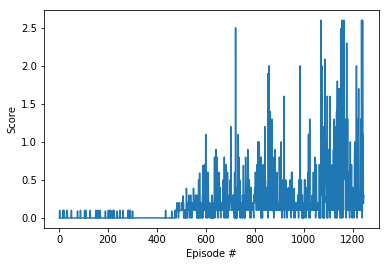

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()